# Paper Reproduction

---

Author: ZHANG, Yiling  
Date: 27/10   
Paper: [A pan-cancer single-cell transcriptional atlas of tumor infiltrating myeloid cells, Cheng,Sijin et al.,Cell,2021](https://www.cell.com/cell/fulltext/S0092-8674(21)00010-6#secsectitle0075)

---

**Notes**   

This notebook is about the processing procedure for paper reproduction, other report and files please refer to:  

* Report: https://hiiiyilingzhang.gitbook.io/panmyeloid-assignment/
* Data Exploration Notebook: 
* Source Code: [GitHub-hiiiyilingzhang/PanMyeloid-assignment](https://github.com/hiiiyilingzhang/PanMyeloid-assignment)
* TROUBLESHOOTING: 

---

## 1. Environment Setting

In [1]:
import os
print (os.getcwd())

/home/data/vip8t02/Project/PanMyeloid-assignment/report


In [2]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
%matplotlib inline

sc.settings.verbosity = 3    # errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)
sc.logging.print_versions()

scanpy==1.4.3 anndata==0.7.6 umap==0.3.9 numpy==1.21.2 scipy==1.7.1 pandas==1.3.3 scikit-learn==0.24.2 statsmodels==0.13.0 python-igraph==0.9.7 


* Check data integrity -- if data seems good, it will print its direction.

In [4]:
import os
import gzip

def check_integrity(local_file):
    if local_file.endswith('csv.gz'and'tsv.gz'):
        with gzip.open(local_file, 'rb') as f:
            try:
                f.seek(-1, os.SEEK_END)
            except:
                return -1
    return 0

# Go through dir and check integrity
# Return data (gunzip doesn;t show invalid compressed data)
for curDir, dirs, files in os.walk("../rawData"):
    for file in files:
        if check_integrity(os.path.join(curDir, file))==0:
            print(os.path.join(curDir, file))

../rawData/MEL-treatment/MEL_patient_cell_id.csv
../rawData/MEL-treatment/scanpy_qc_filtered_MEL.h5ad
../rawData/MEL-treatment/GSE120575_patient_ID_single_cells.txt
../rawData/MEL-treatment/GSE120575_Sade_Feldman_melanoma_single_cells_TPM_GEO.csv
../rawData/MEL-treatment/GSE120575_TPM_original.txt.gz
../rawData/MEL-treatment/GSE120575_Sade_Feldman_melanoma_single_cells_TPM_GEO.txt.gz
../rawData/PAAD/GSE154763_PAAD_normalized_expression.csv.gz
../rawData/PAAD/GSE154763_PAAD_metadata.csv.gz
../rawData/anno.ref/ImmGen.RData
../rawData/anno.ref/hpca-se.RData
../rawData/LYM/GSE154763_LYM_normalized_expression.csv.gz
../rawData/LYM/GSE154763_LYM_metadata.csv.gz
../rawData/MYE/GSE154763_MYE_normalized_expression.csv.gz
../rawData/MYE/GSE154763_MYE_metadata.csv.gz
../rawData/ESCA/GSE154763_ESCA_metadata.csv.gz
../rawData/ESCA/GSE154763_ESCA_normalized_expression.csv.gz
../rawData/UCEC/GSE154763_UCEC_metadata.csv.gz
../rawData/UCEC/GSE154763_UCEC_normalized_expression.csv.gz
../rawData/LUNG/GSM

## 2. Collected Dataset(LUNG) Preprocessing

>For other collected scRNA-seq datasets, we applied the same filtering steps to 10X Genomics datasets (LUNG, KIDNEY, STAD, CRC, HCC, NPC and PAAD). For inDrop datasets, we removed cells with less than 300 total count and cells with more than 20% mitochondrial gene count.

* change  
16,291 immune cells from 48 tumor samples of melanoma patients treated with checkpoint inhibitors
* Libraries were generated with the Smart-Seq2 protocol 
* Illumina NextSeq 500 sequencer with paired-end 38-base reads
* FASTQ files were aligned to the NCBI Human Reference Genome Build GRCh37 (hg19) using STAR

### 2.1 Create Scanpy Object

In [5]:
LUNG_p1t1 = sc.read_csv("../rawData/LUNG/GSM3635282_human_p1b1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p1t1.obs['patient']="LUNG_p1"
LUNG_p1t1.obs['Library']="p1t1"
LUNG_p1b1 = sc.read_csv("../rawData/LUNG/GSM3635282_human_p1b1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p1b1.obs['patient']="LUNG_p1"
LUNG_p1b1.obs['Library']="p1b1"
LUNG_p2t1 = sc.read_csv("../rawData/LUNG/GSM3635285_human_p2t1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p2t1.obs['patient']="LUNG_p2"
LUNG_p2t1.obs['Library']="p2t1"
LUNG_p2b1 = sc.read_csv("../rawData/LUNG/GSM3635287_human_p2b1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p2b1.obs['patient']="LUNG_p2"
LUNG_p2b1.obs['Library']="p2b1"
LUNG_p3t1 = sc.read_csv("../rawData/LUNG/GSM3635288_human_p3t1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p3t1.obs['patient']="LUNG_p3"
LUNG_p3t1.obs['Library']="p3t1"
LUNG_p3b1 = sc.read_csv("../rawData/LUNG/GSM3635291_human_p3b1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p3b1.obs['patient']="LUNG_p3"
LUNG_p3b1.obs['Library']="p3b1"
LUNG_p4t1 = sc.read_csv("../rawData/LUNG/GSM3635292_human_p4t1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p4t1.obs['patient']="LUNG_p4"
LUNG_p4t1.obs['Library']="p4t1"
LUNG_p4b1 = sc.read_csv("../rawData/LUNG/GSM3635295_human_p4b1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p4b1.obs['patient']="LUNG_p4"
LUNG_p4b1.obs['Library']="p4b1"
LUNG_p5t1 = sc.read_csv("../rawData/LUNG/GSM3635296_human_p5t1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p5t1.obs['patient']="LUNG_p5"
LUNG_p5t1.obs['Library']="p5t1"
LUNG_p6t1 = sc.read_csv("../rawData/LUNG/GSM3635298_human_p6t1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p6t1.obs['patient']="LUNG_p6"
LUNG_p6t1.obs['Library']="p6t1"
LUNG_p6b1 = sc.read_csv("../rawData/LUNG/GSM3635300_human_p6b1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p6b1.obs['patient']="LUNG_p6"
LUNG_p6b1.obs['Library']="p6b1"
LUNG_p7t1 = sc.read_csv("../rawData/LUNG/GSM3635301_human_p7t1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p7t1.obs['patient']="LUNG_p7"
LUNG_p7t1.obs['Library']="p7t1"
LUNG_p7b1 = sc.read_csv("../rawData/LUNG/GSM3635303_human_p7b1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p7b1.obs['patient']="LUNG_p7"
LUNG_p7b1.obs['Library']="p7b1"
# merge into one object.
LUNG = LUNG_p1t1.concatenate(LUNG_p1b1,LUNG_p2t1,LUNG_p2b1,LUNG_p3t1,LUNG_p3b1,LUNG_p4t1,LUNG_p4b1,LUNG_p5t1,LUNG_p6t1,LUNG_p6b1,LUNG_p7t1,LUNG_p7b1)

In [6]:
LUNG.obs['cancer']="LUNG"
LUNG.obs['tech']="inDrop"

LUNG.write_h5ad("../rawData/LUNG/scanpy_raw_LUNG.h5ad")
LUNG

... storing 'patient' as categorical
... storing 'Library' as categorical
... storing 'cancer' as categorical
... storing 'tech' as categorical


AnnData object with n_obs × n_vars = 90174 × 41861
    obs: 'patient', 'Library', 'batch', 'cancer', 'tech'

### 2.2 Computing quality control metrics

First, let Scanpy calculate some general qc-stats for genes and cells with the function `sc.pp.calculate_qc_metrics`, similar to `PercentageFeatureSet` in Seurat. It can also calculate proportion of counts for specific gene populations, so first we need to define which genes are mitochondrial, ribosomal and hemoglogin.

* Labeling spike-ins  
    If it is Smart-Seq2 data, we may have spike-ins.We can label them in LUNG.var as a gene annotation. Here is the example code:
    ``` python
    is_spike_in = {}
    number_of_spike_ins = 0

    for gene_name in LUNG.var_names:
        if 'ERCC' in gene_name:
            is_spike_in[gene_name] = True
            number_of_spike_ins += 1
        else:
            is_spike_in[gene_name] = False
        
    LUNG.var['ERCC'] = pd.Series(is_spike_in)
    print('Numbers of spike-ins detected: ', number_of_spike_ins)
    ```

* Mito Calculation

In [7]:
# mitochondrial genes
LUNG.var['mt'] = LUNG.var_names.str.startswith('MT-') 

* CD3E+ Myeloid Cluster(both express CD3E and CST3)

In [8]:
LUNG.var['CST3'] = LUNG.var_names.str.startswith('CST3') 
LUNG.var['CD3E'] = LUNG.var_names.str.startswith('CD3E')

* Heat shock protein assiciated genes(HSP) -- Needs to be regressed out

In [9]:
LUNG.var['HSP'] = LUNG.var_names.str.startswith('HSP')

In [10]:
sc.pp.calculate_qc_metrics(LUNG, qc_vars=["mt","CD3E","CST3","HSP"], percent_top=None, inplace=True)

# for plotting
qc = sc.pp.calculate_qc_metrics(LUNG, qc_vars = ["mt","HSP","CD3E","CST3"])             
cell_qc_dataframe = qc[0]
gene_qc_dataframe = qc[1]

In [11]:
LUNG

AnnData object with n_obs × n_vars = 90174 × 41861
    obs: 'patient', 'Library', 'batch', 'cancer', 'tech', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_CD3E', 'log1p_total_counts_CD3E', 'pct_counts_CD3E', 'total_counts_CST3', 'log1p_total_counts_CST3', 'pct_counts_CST3', 'total_counts_HSP', 'log1p_total_counts_HSP', 'pct_counts_HSP'
    var: 'mt', 'CST3', 'CD3E', 'HSP', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

### 2.3 Plot QC

* Library size  
First, we consider the total number of reads detected per cell. Cells with few reads are likely to have been broken or failed to capture a cell, and should thus be removed.

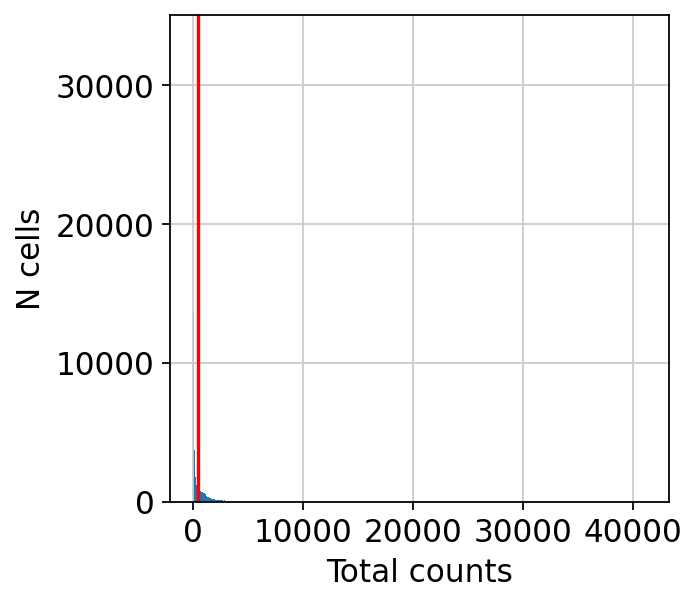

In [12]:
plt.hist(cell_qc_dataframe['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')
plt.axvline(500, color='red')

* Detected genes   
We also want to make sure that the reads are distributed across the transcriptome.Here I viualized the total number of unique genes detected in each sample.  

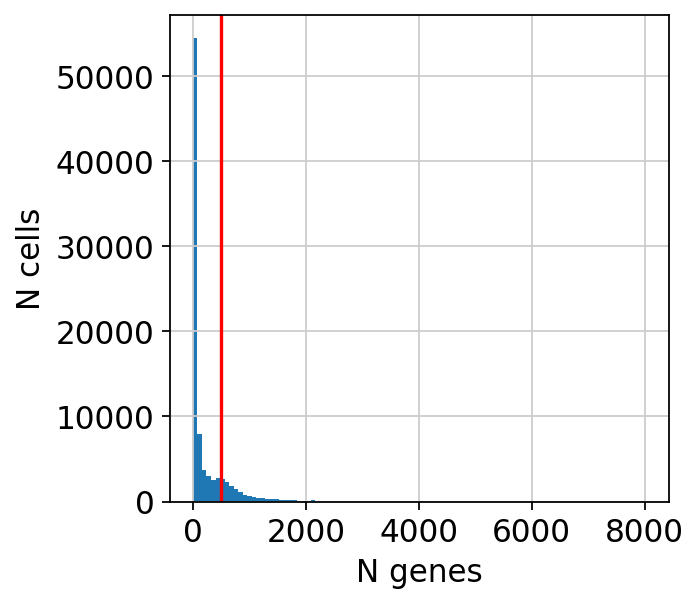

In [13]:
plt.hist(cell_qc_dataframe['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.axvline(500, color='red')

### 2.4 Cell Filtering

Filtering criteria used (Here is the valus mentioned in paper, actually those values are highly dependent on the library preparation method used)
* 500 < Number of Detected Genes < 5,000
* 300 < Total UMI Count < 40.000
* Mitochondrial Percentage < 20%

In [14]:
print("Before Cell Filtering:",LUNG.n_obs, LUNG.n_vars)
sc.pp.filter_cells(LUNG, max_genes=5000)
sc.pp.filter_cells(LUNG, min_genes=500)
print("After Cell Filtering:",LUNG.n_obs, LUNG.n_vars)

Before Cell Filtering: 90174 41861
filtered out 18 cells that have more than  5000 genes expressed
filtered out 75016 cells that have less than 500 genes expressed
After Cell Filtering: 15140 41861


In [15]:
print("Before Cell Filtering:",LUNG.n_obs, LUNG.n_vars)
sc.pp.filter_cells(LUNG, max_counts=40000)
sc.pp.filter_cells(LUNG, min_counts=300)
print("After Cell Filtering:",LUNG.n_obs, LUNG.n_vars)

Before Cell Filtering: 15140 41861
After Cell Filtering: 15140 41861


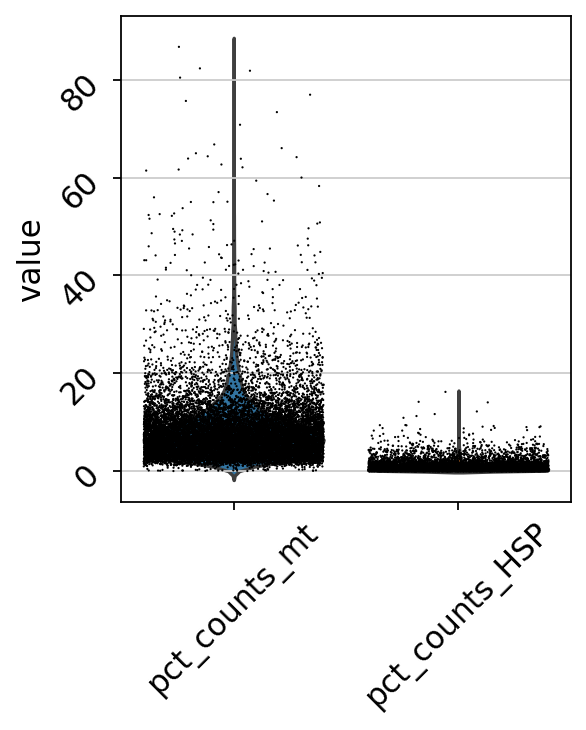

In [16]:
sc.pl.violin(LUNG, ['pct_counts_mt','pct_counts_HSP'],jitter=0.4, rotation= 45)

As the ribosomal proteins are highly expressed in this data set, they will make up a larger proportion of the transcriptional landscape when fewer of the lowly expressed genes are detected. However, percent.ribo wasn't taken into consideration according to the protocol.

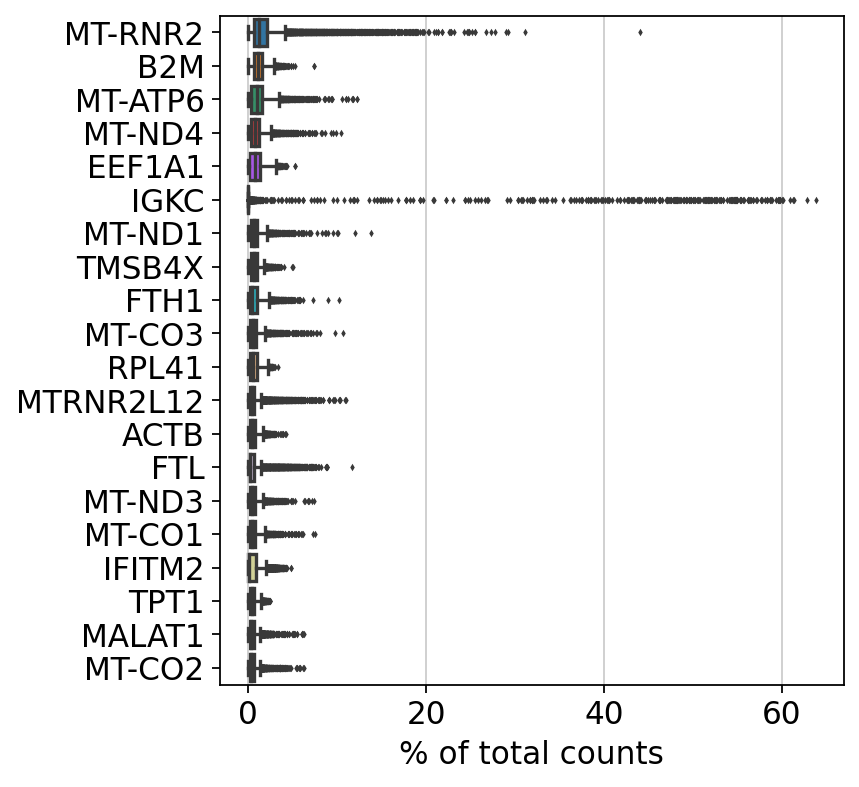

In [17]:
sc.pl.highest_expr_genes(LUNG, n_top=20)

In [18]:
# filter for percent mito
LUNG = LUNG[LUNG.obs['pct_counts_mt'] < 20, :]

print("Remaining cells %d"%LUNG.n_obs)

Remaining cells 14520


### 2.5 Quality Control for Genes

We keep detectable genes if at least two cells contain more than 5 reads from the gene, but the threshold strongly depends on the sequencing depth.  

**ATTENTION:** genes must be filtered after cell filtering since some genes may only be detected in poor quality cells.

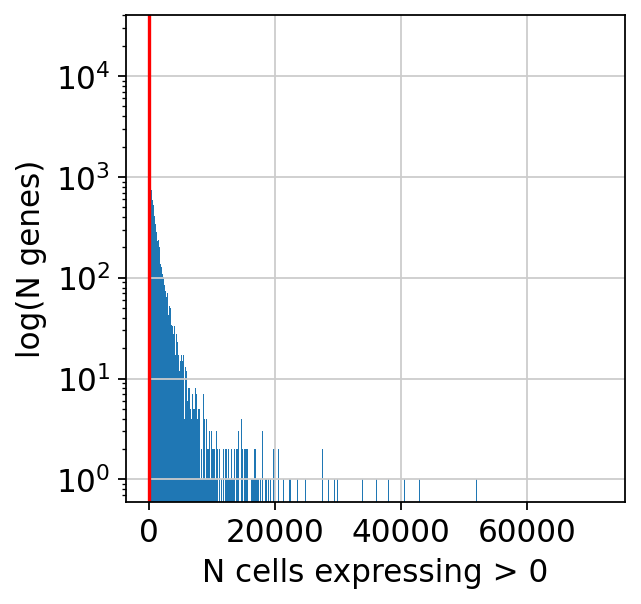

In [19]:
plt.hist(gene_qc_dataframe['n_cells_by_counts'], bins=1000)
plt.xlabel('N cells expressing > 0')
plt.ylabel('log(N genes)')
plt.axvline(3, color='red')
plt.yscale('log') 

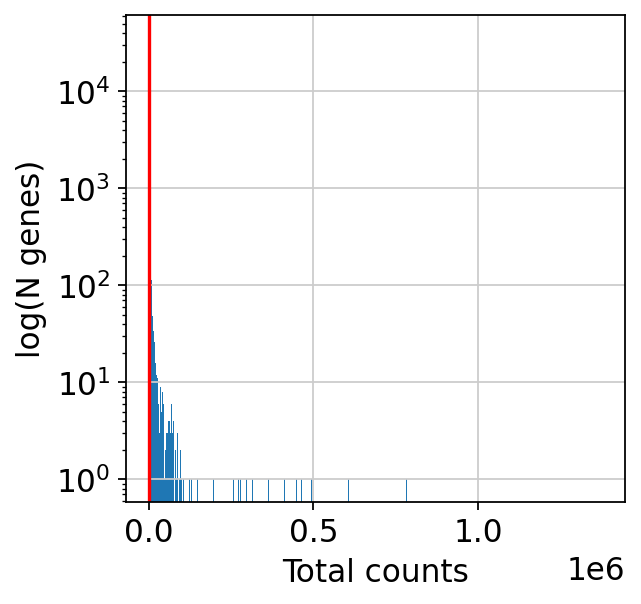

In [20]:
plt.hist(gene_qc_dataframe['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('log(N genes)')
plt.yscale('log') 
plt.axvline(10, color='red')

Not memtioned in the paper, but we usually exclude genes that expressed in less that two cells.

In [21]:
print("Before Gene Filtering:",LUNG.n_obs, LUNG.n_vars)
sc.pp.filter_genes(LUNG, min_cells = 2)
print("After Gene Filtering:",LUNG.n_obs, LUNG.n_vars)

Before Gene Filtering: 14520 41861


Trying to set attribute `.var` of view, copying.


filtered out 6570 genes that are detected in less than 2 cells
After Gene Filtering: 14520 35291


### 2.6 Remove the CD3E+ myeloid cluster

>Notably, we removed the CD3E+ myeloid cluster with a large fraction of potential doublets predicted by Scrublet (Wolock et al., 2019), which expressed both myeloid gene signature (CST3) and T cell signature (CD3E).

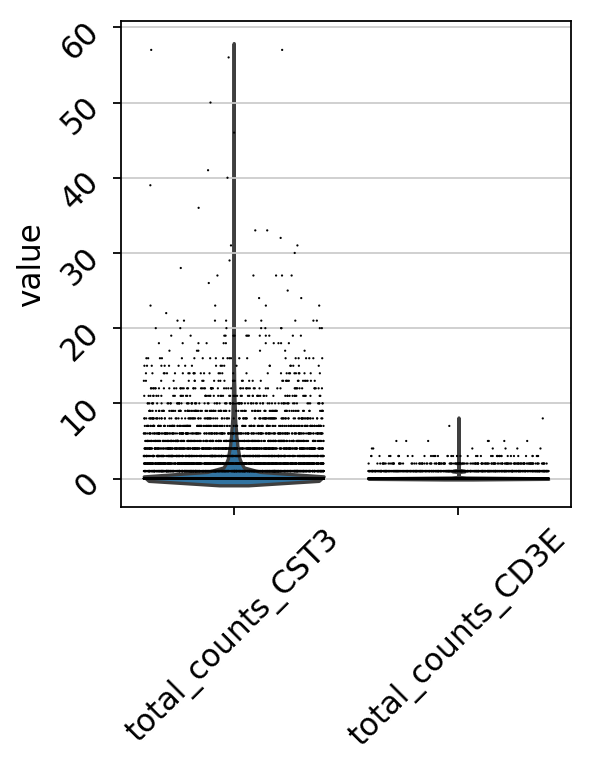

In [22]:
sc.pl.violin(LUNG, ['total_counts_CST3','total_counts_CD3E'],jitter=0.4, rotation= 45)

In [23]:
print("Before CD3E+ Myeloid Cluster Filtering:",LUNG.n_obs, LUNG.n_vars)
LUNG = LUNG[(LUNG.obs['total_counts_CST3']==0)&(LUNG.obs['total_counts_CD3E']==0), :]
print("After CD3E+ Myeloid Cluster Filtering:",LUNG.n_obs, LUNG.n_vars)

Before CD3E+ Myeloid Cluster Filtering: 14520 35291
After CD3E+ Myeloid Cluster Filtering: 9623 35291


### 2.7 Normalization

>After quality control, we applied the library-size correction method to normalize the raw count by using `normalize_total` function in Scanpy. Then the logarithmized normalized count matrix was used for the downstream analysis.

Actually, there are two main approaches to normalize single cell data: 
1. One is a simple linear scaling to adjust counts such that each cell has about the same total library size. Examples include converting to counts per million (CPM) which does a reasonable job of correcting for differences in library size.

2. Another methods are more complex, and generally involve parametric modeling of count data to perform nonlinear normalization. These methods are useful when there are more complex sources of unwanted variation (e.g., for highly heterogeneous populations of cells with different sizes).

We usually just stick to the simple, but still need extract attention for some spectial situations. Here is a review [Cole,Michael B.et al.,
Cell Systems, 2019](https://www.cell.com/cell-systems/fulltext/S2405-4712(19)30080-8?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS2405471219300808%3Fshowall%3Dtrue#secsectitle0020) for the comparison of normalization methods.

In [24]:
# normalize with counts per million, excluding highly expressed genes from the size factor calculation.
sc.pp.normalize_per_cell(LUNG, counts_per_cell_after=1e4)

# logaritmize
sc.pp.log1p(LUNG)

Trying to set attribute `.obs` of view, copying.


In [25]:
# organize .obs
LUNG.obs = LUNG.obs.drop(['log1p_total_counts', 'log1p_n_genes_by_counts','total_counts_mt', 'log1p_total_counts_mt', 'log1p_total_counts_CD3E', 'log1p_total_counts_CST3', 'total_counts_HSP', 'log1p_total_counts_HSP'], axis=1)
LUNG.obs.rename(columns={'pct_counts_HSP':'percent_hsp','pct_counts_mt':'percent_mito'},inplace=True)

# store normalized counts in the raw slot, 
import os
LUNG.write_h5ad("../processedData/scanpy_qc_filtered_LUNG.h5ad")

## 3. Create one merged object

* Newly Generated Datasets Processing(**Already weht through QC procedure and normalization**)
    - 10x Chromium Single cell 5' Library
    - Illumina Hiseq X Ten sequencer with 150-bp paired-end reads
    - Aligned and quantified using the Cell Ranger against GRCh38

### 3.1 Create Scanpy Object for newly generated datasets

In [26]:
PAAD = pd.read_csv("../rawData/PAAD/GSE154763_PAAD_normalized_expression.csv.gz", index_col=0)
cellinfo = pd.read_csv("../rawData/PAAD/GSE154763_PAAD_metadata.csv.gz", index_col=0)
geneinfo = pd.DataFrame(PAAD.columns,index=PAAD.columns,columns=['genes_index'])

PAAD_ann = sc.AnnData(PAAD, obs=cellinfo, var = geneinfo)
PAAD_ann

AnnData object with n_obs × n_vars = 2853 × 14140
    obs: 'percent_mito', 'n_counts', 'percent_hsp', 'barcode', 'batch', 'library_id', 'cancer', 'patient', 'tissue', 'n_genes', 'MajorCluster', 'source', 'tech', 'UMAP1', 'UMAP2'
    var: 'genes_index'

In [27]:
MYE = pd.read_csv("../rawData/MYE/GSE154763_MYE_normalized_expression.csv.gz", index_col=0)
cellinfo = pd.read_csv("../rawData/MYE/GSE154763_MYE_metadata.csv.gz", index_col=0)
geneinfo = pd.DataFrame(MYE.columns,index=MYE.columns,columns=['genes_index'])

MYE_ann = sc.AnnData(MYE, obs=cellinfo, var = geneinfo)
MYE_ann

AnnData object with n_obs × n_vars = 7619 × 15634
    obs: 'batch', 'patient', 'tissue', 'percent_hsp', 'percent_mito', 'n_genes', 'n_counts', 'MajorCluster', 'source', 'tech', 'cancer', 'UMAP1', 'UMAP2'
    var: 'genes_index'

In [28]:
ESCA = pd.read_csv("../rawData/ESCA/GSE154763_ESCA_normalized_expression.csv.gz", index_col=0)
cellinfo = pd.read_csv("../rawData/ESCA/GSE154763_ESCA_metadata.csv.gz", index_col=0)
geneinfo = pd.DataFrame(ESCA.columns,index=ESCA.columns,columns=['genes_index'])

ESCA_ann = sc.AnnData(ESCA, obs=cellinfo, var = geneinfo)
ESCA_ann

AnnData object with n_obs × n_vars = 7673 × 15550
    obs: 'percent_mito', 'n_counts', 'percent_hsp', 'barcode', 'batch', 'library_id', 'cancer', 'patient', 'tissue', 'n_genes', 'MajorCluster', 'source', 'tech', 'UMAP1', 'UMAP2'
    var: 'genes_index'

In [29]:
UCEC = pd.read_csv("../rawData/UCEC/GSE154763_UCEC_normalized_expression.csv.gz", index_col=0)
cellinfo = pd.read_csv("../rawData/UCEC/GSE154763_UCEC_metadata.csv.gz", index_col=0)
geneinfo = pd.DataFrame(UCEC.columns,index=UCEC.columns,columns=['genes_index'])

UCEC_ann = sc.AnnData(UCEC, obs=cellinfo, var = geneinfo)
UCEC_ann

AnnData object with n_obs × n_vars = 8808 × 15849
    obs: 'percent_mito', 'n_counts', 'percent_hsp', 'barcode', 'batch', 'library_id', 'cancer', 'patient', 'tissue', 'n_genes', 'MajorCluster', 'source', 'tech', 'UMAP1', 'UMAP2'
    var: 'genes_index'

In [30]:
OVFTC = pd.read_csv("../rawData/OV-FTC/GSE154763_OV-FTC_normalized_expression.csv.gz", index_col=0)
cellinfo = pd.read_csv("../rawData/OV-FTC/GSE154763_OV-FTC_metadata.csv.gz", index_col=0)
geneinfo = pd.DataFrame(OVFTC.columns,index=OVFTC.columns,columns=['genes_index'])

OVFTC_ann = sc.AnnData(OVFTC, obs=cellinfo, var = geneinfo)
OVFTC_ann

AnnData object with n_obs × n_vars = 3888 × 14008
    obs: 'percent_mito', 'n_counts', 'percent_hsp', 'barcode', 'batch', 'library_id', 'cancer', 'patient', 'tissue', 'n_genes', 'MajorCluster', 'source', 'tech', 'UMAP1', 'UMAP2'
    var: 'genes_index'

In [31]:
LYM = pd.read_csv("../rawData/LYM/GSE154763_LYM_normalized_expression.csv.gz", index_col=0)
cellinfo = pd.read_csv("../rawData/LYM/GSE154763_LYM_metadata.csv.gz", index_col=0)
geneinfo = pd.DataFrame(LYM.columns,index=LYM.columns,columns=['genes_index'])

LYM_ann = sc.AnnData(LYM, obs=cellinfo, var = geneinfo)
LYM_ann

AnnData object with n_obs × n_vars = 615 × 11283
    obs: 'batch', 'patient', 'tissue', 'percent_hsp', 'percent_mito', 'n_genes', 'n_counts', 'MajorCluster', 'source', 'tech', 'cancer', 'UMAP1', 'UMAP2'
    var: 'genes_index'

In [32]:
# Get the metadata-added LUNG scanpy object
LUNG_ann = sc.read_h5ad("../processedData/metadata_added_filtered_LUNG.h5ad")
LUNG_ann.obs.rename(columns={'Major.cell.type':'MajorCluster'},inplace=True)
LUNG_ann.obs['cancer']="LUNG"
LUNG_ann.obs['tech']="inDrop"
LUNG_ann.obs['patient']="patient" + LUNG_ann.obs["patient"].astype('str')
LUNG_ann

AnnData object with n_obs × n_vars = 9623 × 35291
    obs: 'patient', 'Library', 'batch', 'cancer', 'tech', 'n_genes_by_counts', 'total_counts', 'percent_mito', 'total_counts_CD3E', 'pct_counts_CD3E', 'total_counts_CST3', 'pct_counts_CST3', 'percent_hsp', 'n_genes', 'n_counts', 'Barcode', 'patient.x', 'Tissue', 'Barcoding.emulsion', 'Total.counts', 'Percent.counts.from.mitochondrial.genes', 'Most.likely.LM22.cell.type', 'MajorCluster', 'Minor.subset'
    var: 'mt', 'CST3', 'CD3E', 'HSP', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

### 3.2 Merge and Examine Data

In [33]:
# merge into one object.
alldata = LYM_ann.concatenate(PAAD_ann,LUNG_ann,OVFTC_ann,UCEC_ann,ESCA_ann,MYE_ann)
print(alldata.obs['cancer'].value_counts())

LUNG      9623
UCEC      8808
ESCA      7673
MYE       7619
OV-FTC    3888
PAAD      2853
LYM        615
Name: cancer, dtype: int64


* Regress out covariates

> Then, effects of the total count per cell, the percentage of mitochondrial gene count and the percentage of count for heat shock protein associated genes (HSP) were regressed out by using scanpy.pp.regress_out function.

This is achieved by doing a generalized linear regression using these parameters as covariates in the model. Then the residuals of the model are taken as the "regressed data".

In [ ]:
# regress out unwanted variables
sc.pp.regress_out(alldata, ['n_counts', 'percent_mito','percent_hsp'])

... storing 'patient' as categorical
... storing 'tissue' as categorical
... storing 'MajorCluster' as categorical
... storing 'source' as categorical
... storing 'tech' as categorical
... storing 'cancer' as categorical


regressing out ['n_counts', 'percent_mito', 'percent_hsp']


... storing 'barcode' as categorical
... storing 'library_id' as categorical
... storing 'Barcode' as categorical
... storing 'Tissue' as categorical
... storing 'Barcoding.emulsion' as categorical
... storing 'Most.likely.LM22.cell.type' as categorical
... storing 'Minor.subset' as categorical


In [ ]:
# Store the full matrix in the raw slot before doing variable gene selection
alldata.raw = alldata

## 4. Compute HVG and PCA

#### 4.1.1 Compute HVG

We need to find genes that are highly variable across cells, which in turn will also provide a good separation of the cell clusters.

> In brief, 2,000 highly-variable genes were selected for downstream analysis by using scanpy.pp.highly_variable_genes function with parameter “n_top_genes=2000.”

In [ ]:
# compute variable genes
sc.pp.highly_variable_genes(alldata, min_mean=0.0125, max_mean=3, min_disp=0.5, n_top_genes=2000)
print("Highly variable genes: %d"%sum(alldata.var.highly_variable))

#plot variable genes
sc.pl.highly_variable_genes(alldata)

# subset for variable genes in the dataset
alldata = alldata[:, alldata.var['highly_variable']]

#### 4.1.2 PCA 

>A principal component analysis (PCA) matrix with 100 components were calculated to reveal the main axes of variation and denoise the data by using scanpy.tl.pca function with parameter “svd_solver='arpack', n_comps=100.. For visualization, the dimensionality of each dataset was further reduced using Uniform Manifold Approximation and Projection (UMAP) implemented in scanpy.tl.umap function with default parameters.

In [ ]:
sc.tl.pca(alldata, svd_solver='arpack', n_comps=100)

## 4. Batches Removal

### 4.1  Remove Batches from Donors

> To remove the batch effects from different donors, we applied bbknn algorithm with parameter “batch_key='patient', n_pcs=100” to obtain a batch-corrected space.

* Check the batch effect

In [ ]:
sc.pp.neighbors(alldata, n_pcs=100)
sc.tl.umap(alldata)

In [ ]:
sc.pl.umap(alldata, color=['patient','cancer'])

In [ ]:
import bbknn 
bbknn.bbknn(alldata, batch_key='patient',n_pcs=100)

* Check the batch effect after bbknn

In [ ]:
sc.tl.umap(alldata)
sc.pl.umap(alldata, color=['patient','cancer'])

### 4.2  Remove Batches from Platforms

> We run two rounds of Scanorama (Hie et al., 2019), an algorithm that could identify and merge shared cell types among multiple datasets, to remove the batch effects within scRNA-seq datasets of 15 cancer types. First, we applied Scanorama to datasets generated from 3′ library and 5′ library from 10x Genomics to remove the batch effects attribute to these two protocols. Then, a second-round of Scanorama was applied to remove the batch effects resulting from the diverse platforms, including 10x Genomics, MARS-Seq and inDrop. 

Data here only need one round Scanorama for batch effect removal(10X vs inDrop).

In [ ]:
alldata2 = alldata.raw.to_adata() 

# check that the matrix looks like noramlized counts
print(alldata2.X[1:5,1:5])

Detect HVG

In [ ]:
sc.pp.highly_variable_genes(alldata, min_mean=0.0125, max_mean=3, min_disp=0.5,n_top_genes=2000)
var_genes_all = alldata.var.highly_variable
print("Highly variable genes: %d"%sum(var_genes_all))

# use batch_key to detect variable genes in each dataset separately
sc.pp.highly_variable_genes(alldata2, min_mean=0.0125, max_mean=3, min_disp=0.5, batch_key = 'tech')

print("Highly variable genes intersection: %d"%sum(alldata2.var.highly_variable_intersection))

print("Number of batches where gene is variable:")
print(alldata2.var.highly_variable_nbatches.value_counts())
var_genes_batch = alldata2.var.highly_variable_nbatches > 0

Compare overlap of the variable genes.

In [ ]:
print("Any batch var genes: %d"%sum(var_genes_batch))
print("All data var genes: %d"%sum(var_genes_all))
print("Overlap: %d"%sum(var_genes_batch & var_genes_all))
print("Variable genes in all batches: %d"%sum(alldata2.var.highly_variable_nbatches == 2))
print("Overlap batch instersection and all: %d"%sum(var_genes_all & alldata2.var.highly_variable_intersection))

Select all genes that are variable in at least 1 datasets and use for remaining analysis.

In [ ]:
var_select = alldata2.var.highly_variable_nbatches >= 1
var_genes = var_select.index[var_select]
len(var_genes)

run Scanorama

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import scanorama

# split per batch into new objects.
batches = alldata.obs['tech'].cat.categories.tolist()
spdata = {}
for batch in batches:
    spdata[batch] = alldata2[alldata2.obs['tech'] == batch,]

spdata

In [ ]:
alldata2 = dict()
for ds in spdata.keys():
    print(ds)
    alldata2[ds] = spdata[ds][:,var_genes]

#convert to list of AnnData objects
adatas = list(alldata2.values())

# run scanorama.integrate
scanorama.integrate_scanpy(adatas, dimred = 50)

In [ ]:
#scanorama adds the corrected matrix to adata.obsm in each of the datasets in adatas.
adatas[0].obsm['X_scanorama'].shape

# Get all the integrated matrices.
scanorama_int = [ad.obsm['X_scanorama'] for ad in adatas]

# make into one matrix.
all_s = np.concatenate(scanorama_int)
print(all_s.shape)

# add to the AnnData object
adata.obsm["Scanorama"] = all_s

### 4.5 Cluster Cells

> To cluster single cells by their expression profiles, we used an unsupervised graph-based clustering algorithm called Leiden (we used different resolutions range from 0.6 to 1 for different datasets). The cluster-specific marker genes were identified by using the scanpy.tl.rank_genes_groups function with default parameters.


The procedure of graph-based clustering:

1. Build a kNN graph from the data
2. Prune spurious connections from kNN graph (optional step). This is a SNN graph.
3. Find groups of cells that maximizes the connections within the group compared other groups.

In [ ]:
sc.tl.leiden(alldata, key_added = "leiden_1.0") # default resolution in 1.0
sc.tl.leiden(alldata, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(alldata, resolution = 0.7, key_added = "leiden_0.7")
sc.tl.leiden(alldata, resolution = 0.8, key_added = "leiden_0.8")
sc.tl.leiden(alldata, resolution = 0.9, key_added = "leiden_0.9")

In [ ]:
sc.pl.umap(alldata, color=['leiden_0.6', 'leiden_0.7', 'leiden_0.8','leiden_0.9','leiden_1.0'])

Once we have done clustering, the relationships between clusters can be calculated as correlation in PCA space and we also visualize some of the marker genes that we used in the Dim Reduction lab onto the clusters.

In [ ]:
genes  = ['CD3E', 'LILRA4', 'CLEC9A', 'CD1C','LAMP3','CD14','INHBA','NLRP3']
sc.pl.dotplot(alldata, genes, groupby='leiden_0.6', dendrogram=True)

In [ ]:
tmp = pd.crosstab(alldata.obs['leiden_0.6'],alldata.obs['cancer'], normalize='index')
tmp.plot.bar(stacked=True).legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)

## 5. Dimensionality Reduction